In [78]:
import os
from scipy import stats
from statsmodels.tsa.ar_model import AutoReg
import pickle

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_theme(rc={'figure.figsize':(14,8)})
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data from a CSV file
file_path = os.path.join('..', 'Dataset', 'data.csv')
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,datetime,temp,dew,humidity,windspeed
0,2023-08-10T00:00:00,28.0,26.0,88.92,16.6
1,2023-08-10T01:00:00,28.0,26.0,88.92,14.8
2,2023-08-10T02:00:00,27.9,25.2,85.28,6.9
3,2023-08-10T03:00:00,28.0,26.0,88.92,7.6
4,2023-08-10T04:00:00,28.0,26.0,88.92,14.8


In [3]:
data = df[['temp', 'dew', 'humidity']] 
data.head()

,temp,dew,humidity
0,28.0,26.0,88.92
1,28.0,26.0,88.92
2,27.9,25.2,85.28
3,28.0,26.0,88.92
4,28.0,26.0,88.92


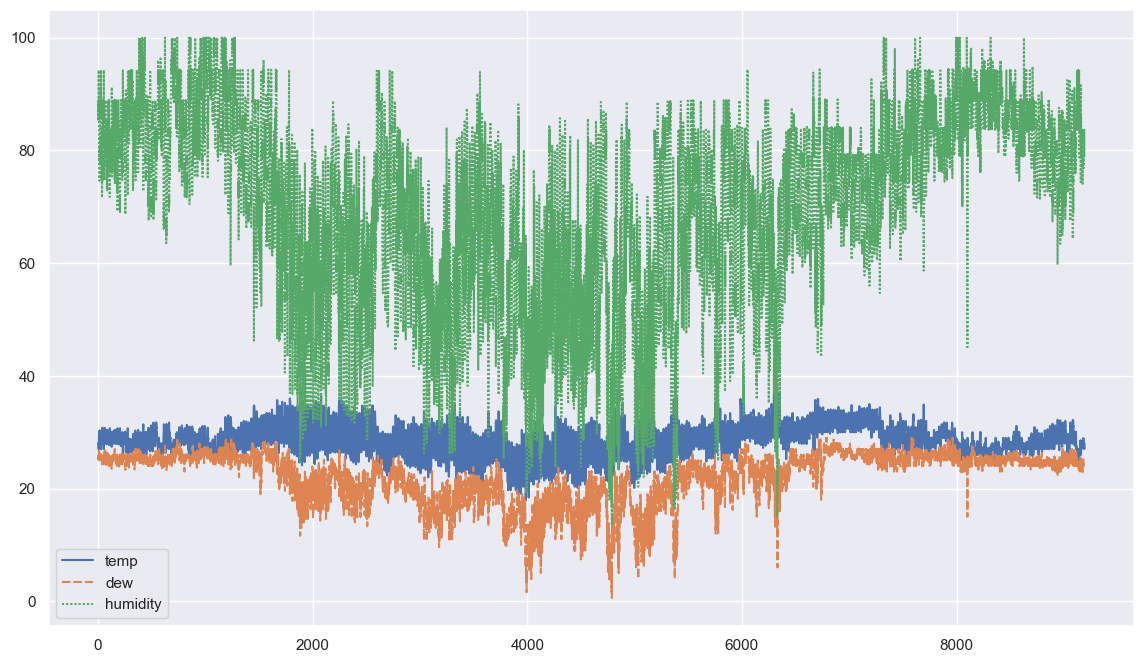

In [4]:
sns.lineplot(data=data)
plt.show()

In [5]:
data.describe()

,temp,dew,humidity
count,9192.000000,9192.000000,9192.000000
mean,28.647824,21.923814,69.485557
std,2.685758,4.693387,17.641357
min,17.900000,0.600000,13.460000
25%,27.000000,19.000000,57.147500
50%,28.700000,24.000000,73.555000
75%,30.400000,25.400000,83.790000
max,38.000000,29.000000,100.000000


# LOGIC:

As per above

> temp < 30 - no and >= 30 - yes

> dew <= 25 - no and > 25 - yes

> humidity < 80 - yes and >= 80 no

In [26]:
data['temp_rule'] = data['temp'].apply(lambda row: 1 if row >= 30 else 0)
data['dew_rule'] = data['dew'].apply(lambda row: 1 if row > 25 else 0)
data['humidity_rule'] = data['humidity'].apply(lambda row: 1 if row < 80 else 0)
data['binary_rule'] = [str(data['temp_rule'][i]) + str(data['dew_rule'][i]) + str(data['humidity_rule'][i]) for i in range(len(data))]
data['value_rule'] = [data['temp_rule'][i] + data['dew_rule'][i] + data['humidity_rule'][i] for i in range(len(data))]
data['label'] = data['value_rule'].apply(lambda row: 1 if row >= 2 else 0)

data.head()

,temp,dew,humidity,temp_rule,dew_rule,humidity_rule,binary_rule,value_rule,label
0,28.0,26.0,88.92,0,1,0,010,1,0
1,28.0,26.0,88.92,0,1,0,010,1,0
2,27.9,25.2,85.28,0,1,0,010,1,0
3,28.0,26.0,88.92,0,1,0,010,1,0
4,28.0,26.0,88.92,0,1,0,010,1,0


In [27]:
data['temp_rule'].value_counts()

0    6136
1    3056
Name: temp_rule, dtype: int64

In [28]:
data['dew_rule'].value_counts()

0    6503
1    2689
Name: dew_rule, dtype: int64

In [29]:
data['humidity_rule'].value_counts()

1    6149
0    3043
Name: humidity_rule, dtype: int64

In [58]:
data['label'].value_counts()

0    6056
1    3136
Name: label, dtype: int64

<Axes: >

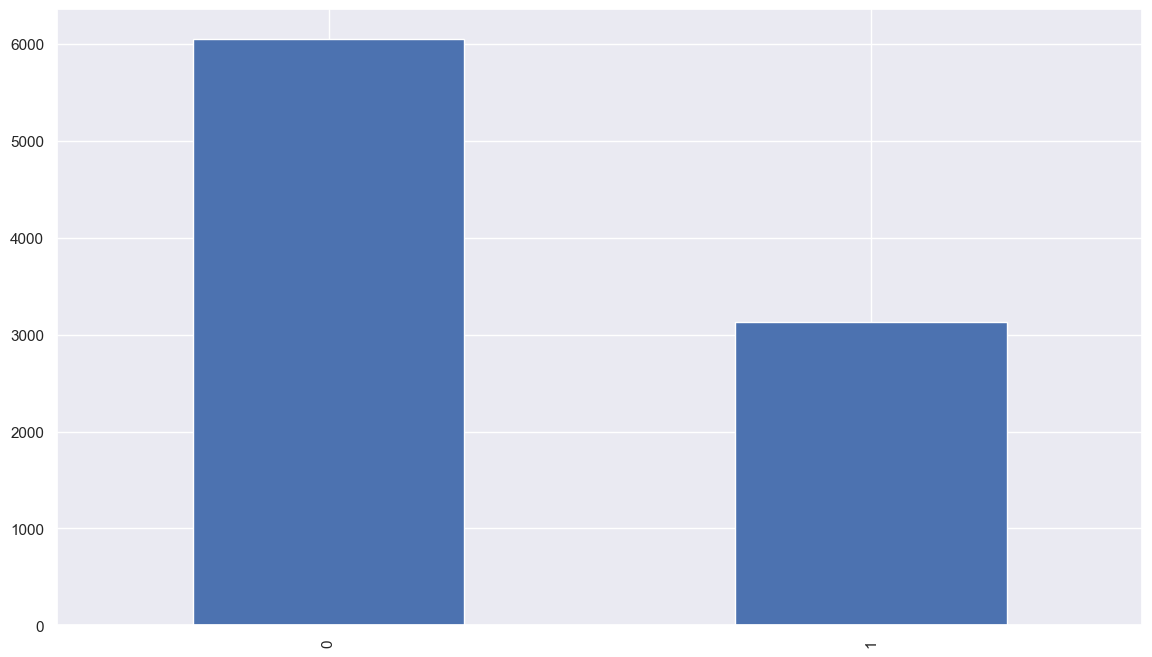

In [35]:
data['label'].value_counts().plot(kind='bar')

In [36]:
data['binary_rule'].value_counts()

001    3250
101    1902
010    1455
000    1351
111     917
110     237
011      80
Name: binary_rule, dtype: int64

In [37]:
data['value_rule'].value_counts()

1    4705
2    2219
0    1351
3     917
Name: value_rule, dtype: int64

In [38]:
data.head()

,temp,dew,humidity,temp_rule,dew_rule,humidity_rule,binary_rule,value_rule,label
0,28.0,26.0,88.92,0,1,0,010,1,0
1,28.0,26.0,88.92,0,1,0,010,1,0
2,27.9,25.2,85.28,0,1,0,010,1,0
3,28.0,26.0,88.92,0,1,0,010,1,0
4,28.0,26.0,88.92,0,1,0,010,1,0


In [39]:
df['label'] = data['label']
df = df.drop('windspeed', axis=1)
df.head()

,datetime,temp,dew,humidity,label
0,2023-08-10T00:00:00,28.0,26.0,88.92,0
1,2023-08-10T01:00:00,28.0,26.0,88.92,0
2,2023-08-10T02:00:00,27.9,25.2,85.28,0
3,2023-08-10T03:00:00,28.0,26.0,88.92,0
4,2023-08-10T04:00:00,28.0,26.0,88.92,0


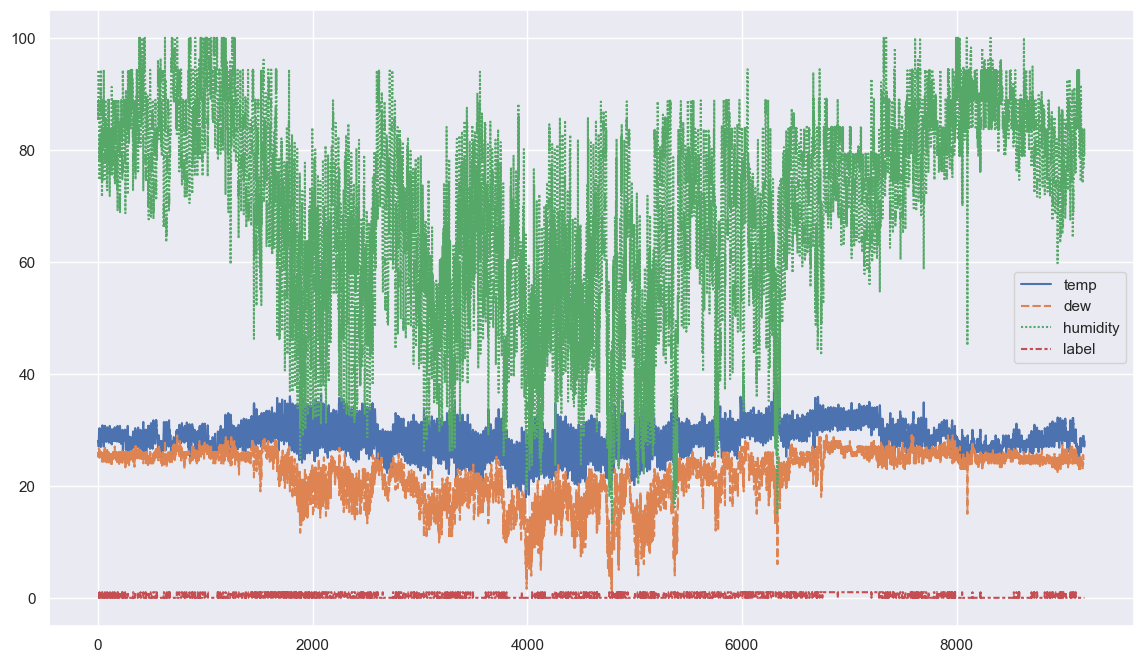

In [40]:
sns.lineplot(data=df)
plt.show()

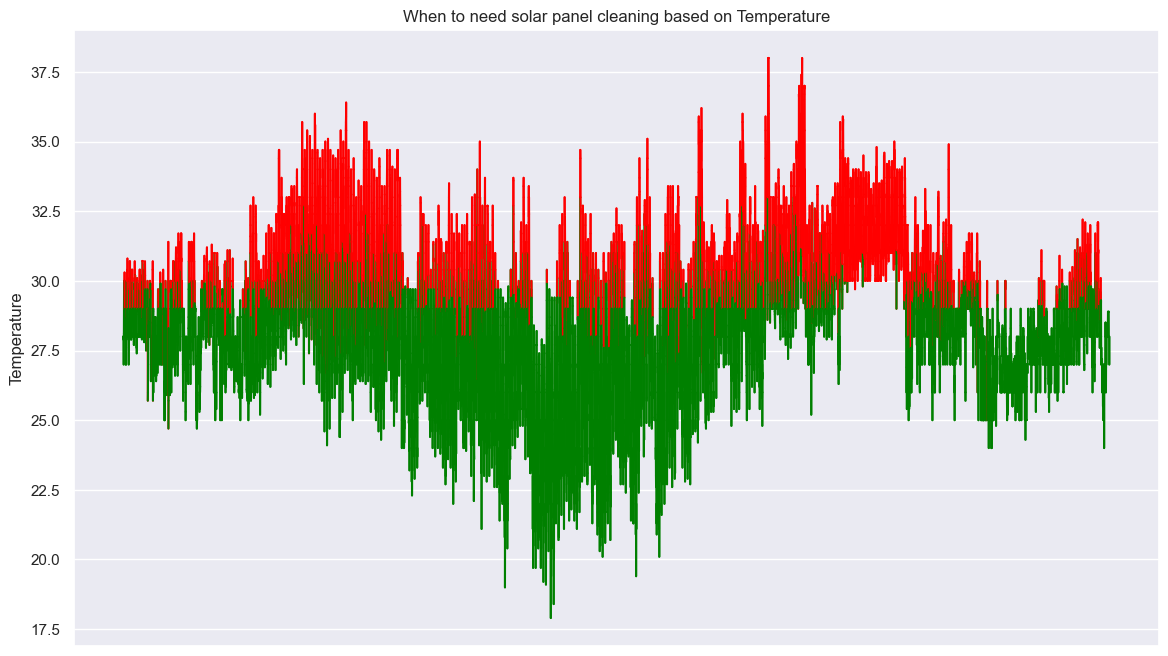

In [96]:
for i in range(len(df) - 1): # .iloc[:1000]
    color = 'red' if df['label'].iloc[i] == 1 else 'green'
    plt.plot(df['datetime'].iloc[i:i+2], df['temp'].iloc[i:i+2], color=color)
    
# Plot labels
plt.xticks([]) # to hide x labels
# plt.xticks(rotation=90)
plt.title("When to need solar panel cleaning based on Temperature")
# plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

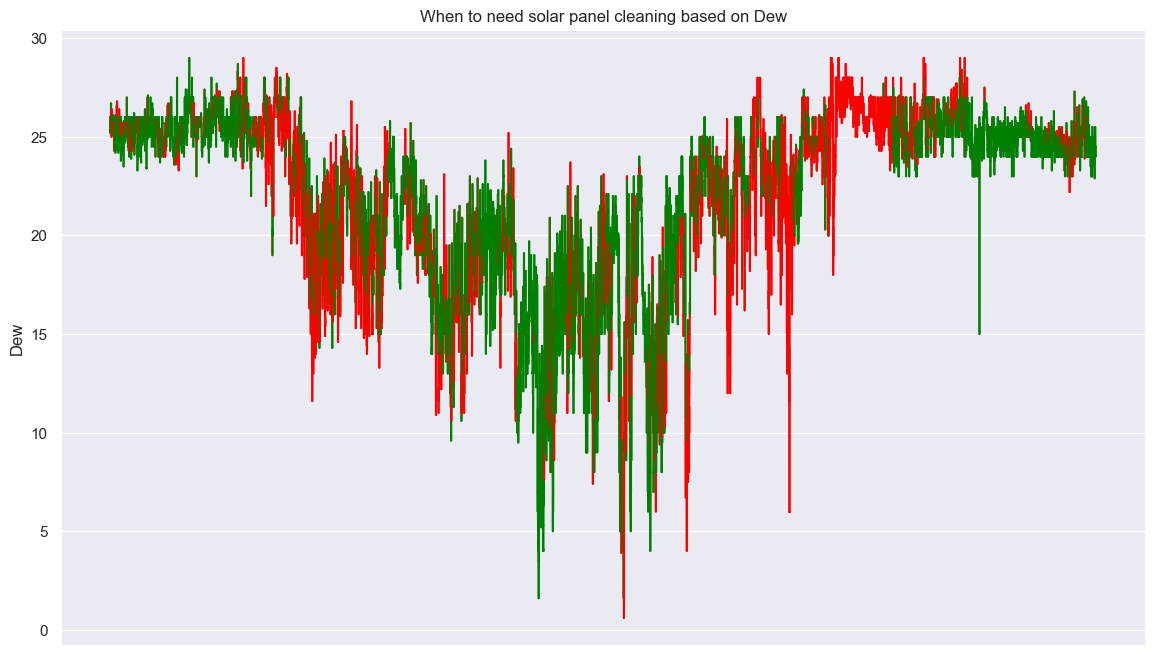

In [97]:
for i in range(len(df) - 1): # .iloc[:1000]
    color = 'red' if df['label'].iloc[i] == 1 else 'green'
    plt.plot(df['datetime'].iloc[i:i+2], df['dew'].iloc[i:i+2], color=color)
    
# Plot labels
plt.xticks([]) # to hide x labels
# plt.xticks(rotation=90)
plt.title("When to need solar panel cleaning based on Dew")
# plt.xlabel("Time")
plt.ylabel("Dew")
plt.show()

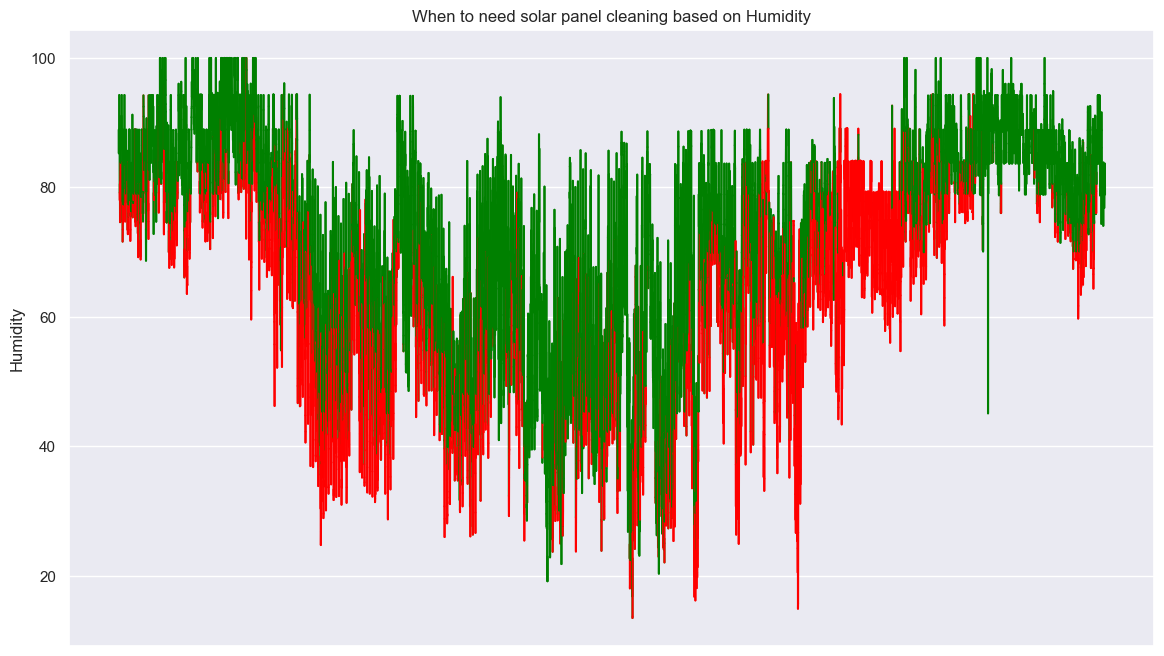

In [98]:
for i in range(len(df) - 1): # .iloc[:1000]
    color = 'red' if df['label'].iloc[i] == 1 else 'green'
    plt.plot(df['datetime'].iloc[i:i+2], df['humidity'].iloc[i:i+2], color=color)
    
# Plot labels
plt.xticks([]) # to hide x labels
# plt.xticks(rotation=90)
plt.title("When to need solar panel cleaning based on Humidity")
# plt.xlabel("Time")
plt.ylabel("Humidity")
plt.show()

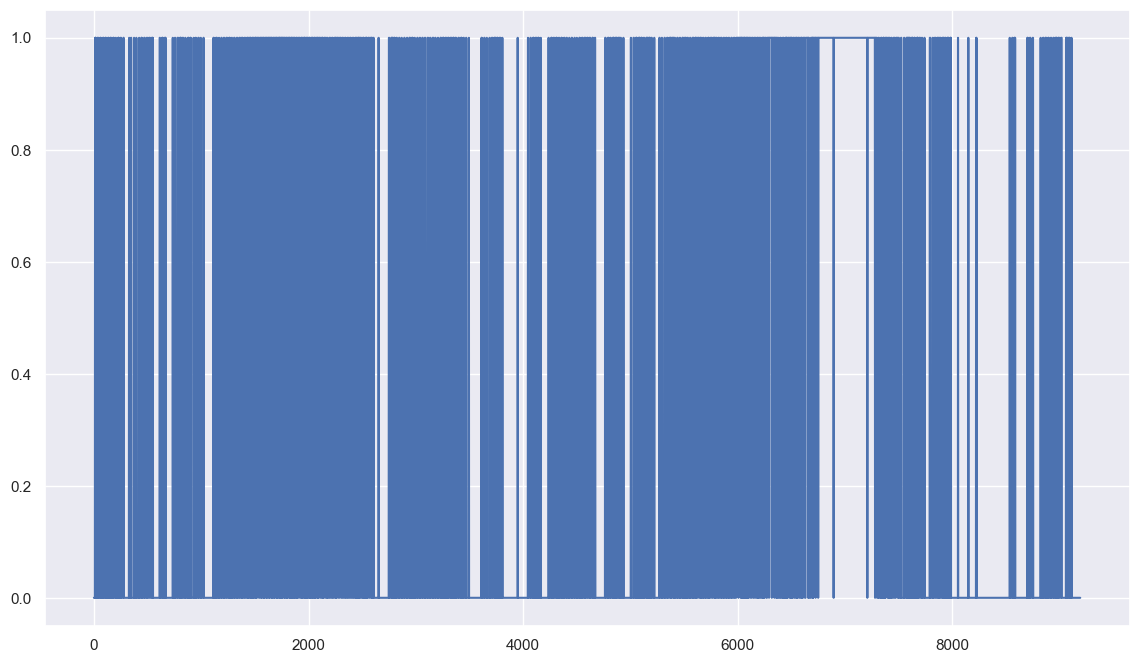

In [99]:
df['label'].plot()
plt.show()

In [67]:
df.to_csv('classification_dataset.csv', index=False)

# Model Building

In [60]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})
# sns.set_theme(rc={'figure.figsize':(14,8)})
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import pickle
import time

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [46]:
data = pd.read_csv('classification_dataset.csv')
data.head()

,datetime,temp,dew,humidity,label
0,2023-08-10T00:00:00,28.0,26.0,88.92,0
1,2023-08-10T01:00:00,28.0,26.0,88.92,0
2,2023-08-10T02:00:00,27.9,25.2,85.28,0
3,2023-08-10T03:00:00,28.0,26.0,88.92,0
4,2023-08-10T04:00:00,28.0,26.0,88.92,0


In [47]:
round(data.describe(),2)

,temp,dew,humidity,label
count,9192.00,9192.00,9192.00,9192.00
mean,28.65,21.92,69.49,0.34
std,2.69,4.69,17.64,0.47
min,17.90,0.60,13.46,0.00
25%,27.00,19.00,57.15,0.00
50%,28.70,24.00,73.56,0.00
75%,30.40,25.40,83.79,1.00
max,38.00,29.00,100.00,1.00


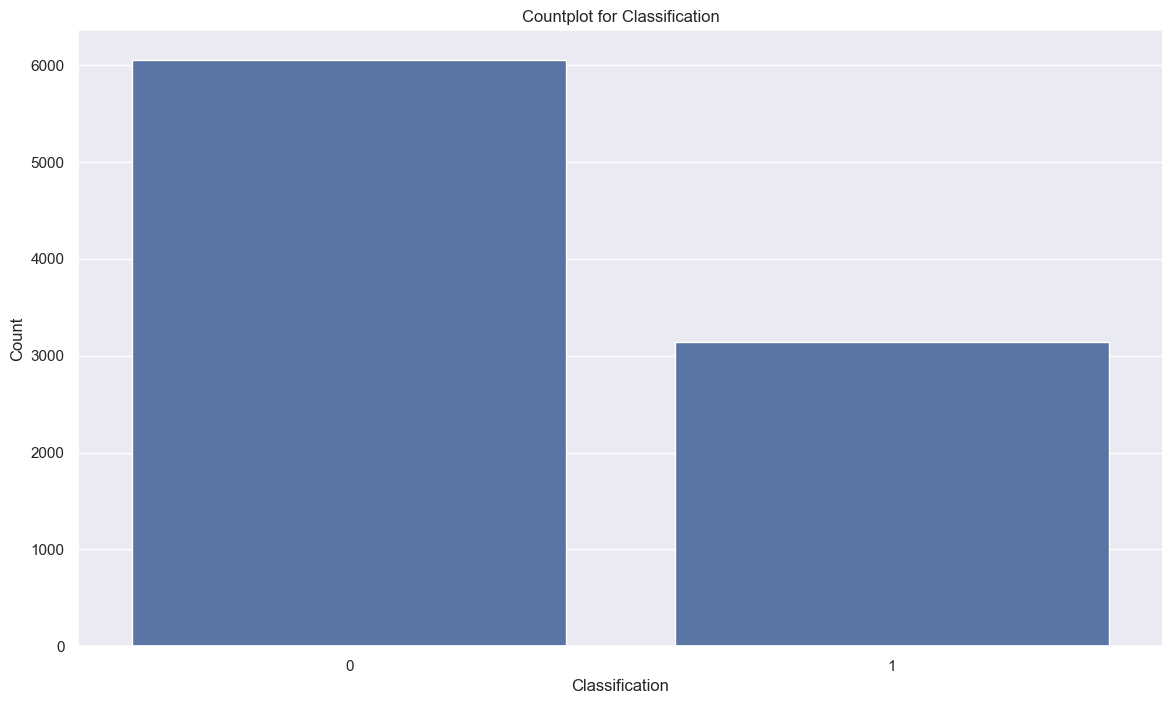

In [48]:
# Check If A Dataset Is Imbalanced
sns.countplot(x=data["label"])
plt.title('Countplot for Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

In [53]:
X, y = data.drop(['datetime', 'label'], axis = 1),  data['label']
X.head()

,temp,dew,humidity
0,28.0,26.0,88.92
1,28.0,26.0,88.92
2,27.9,25.2,85.28
3,28.0,26.0,88.92
4,28.0,26.0,88.92


In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [100]:
# train_test_split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [101]:
# Model initialization
lr_Classifier = LogisticRegression()
knn_Classifier = KNeighborsClassifier()
gnb_Classifier = GaussianNB()
svm_Classifier = SVC(kernel='linear', random_state=42)
knn_Classifier = KNeighborsClassifier(n_neighbors=5)
adaboost_Classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
bagging_Classifier = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
dt_Classifier = DecisionTreeClassifier()
rf_Classifier = RandomForestClassifier()
model_list = [lr_Classifier, knn_Classifier, gnb_Classifier, svm_Classifier, 
              knn_Classifier, adaboost_Classifier, bagging_Classifier, dt_Classifier, rf_Classifier]

Modele name : LogisticRegression
10 K-Fold Accuracy_score : [0.9864 0.9823 0.9864 0.9769 0.981  0.9878 0.9905 0.9864 0.9878 0.9905]
10 K-Fold Average Accuracy_score : 98.56 %
Accuracy_score: 98.64 %
Loss: 1.36 %
Cohen_kappa_score: 96.98 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1212
           1       0.97      0.99      0.98       627

    accuracy                           0.99      1839
   macro avg       0.98      0.99      0.98      1839
weighted avg       0.99      0.99      0.99      1839

confusion_matrix:
 [[1196   16]
 [   9  618]]


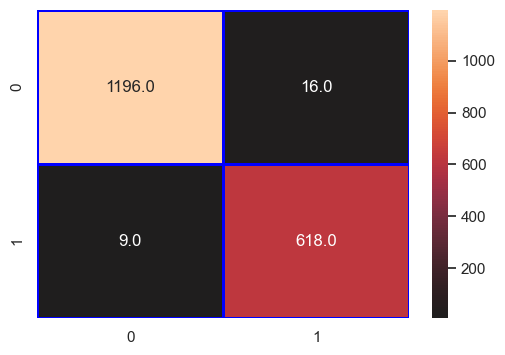




Modele name : KNeighborsClassifier
10 K-Fold Accuracy_score : [0.9918 0.9878 0.9918 0.9891 0.9973 0.9823 0.9918 0.9959 0.9905 0.9946]
10 K-Fold Average Accuracy_score : 99.13 %
Accuracy_score: 98.97 %
Loss: 1.03 %
Cohen_kappa_score: 97.7 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1212
           1       0.98      0.99      0.98       627

    accuracy                           0.99      1839
   macro avg       0.99      0.99      0.99      1839
weighted avg       0.99      0.99      0.99      1839

confusion_matrix:
 [[1202   10]
 [   9  618]]


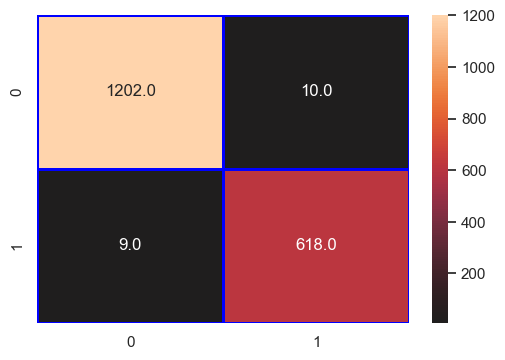




Modele name : GaussianNB
10 K-Fold Accuracy_score : [0.9457 0.9457 0.9633 0.9429 0.9565 0.9469 0.9524 0.9551 0.9551 0.9605]
10 K-Fold Average Accuracy_score : 95.24 %
Accuracy_score: 95.49 %
Loss: 4.51 %
Cohen_kappa_score: 89.83 %
Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1212
           1       0.96      0.91      0.93       627

    accuracy                           0.95      1839
   macro avg       0.96      0.94      0.95      1839
weighted avg       0.95      0.95      0.95      1839

confusion_matrix:
 [[1187   25]
 [  58  569]]


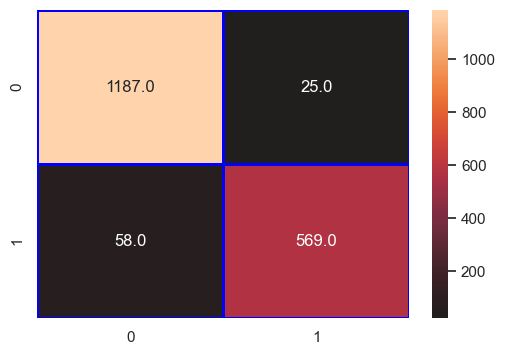




Modele name : SVC
10 K-Fold Accuracy_score : [0.9918 0.9851 0.9891 0.9796 0.9864 0.9946 0.9932 0.9891 0.9932 0.9918]
10 K-Fold Average Accuracy_score : 98.94 %
Accuracy_score: 99.02 %
Loss: 0.98 %
Cohen_kappa_score: 97.81 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1212
           1       1.00      0.98      0.99       627

    accuracy                           0.99      1839
   macro avg       0.99      0.99      0.99      1839
weighted avg       0.99      0.99      0.99      1839

confusion_matrix:
 [[1209    3]
 [  15  612]]


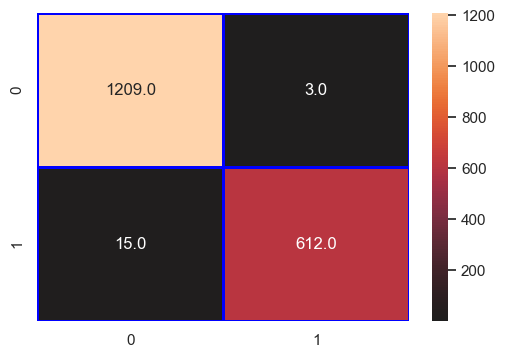




Modele name : KNeighborsClassifier
10 K-Fold Accuracy_score : [0.9918 0.9878 0.9918 0.9891 0.9973 0.9823 0.9918 0.9959 0.9905 0.9946]
10 K-Fold Average Accuracy_score : 99.13 %
Accuracy_score: 98.97 %
Loss: 1.03 %
Cohen_kappa_score: 97.7 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1212
           1       0.98      0.99      0.98       627

    accuracy                           0.99      1839
   macro avg       0.99      0.99      0.99      1839
weighted avg       0.99      0.99      0.99      1839

confusion_matrix:
 [[1202   10]
 [   9  618]]


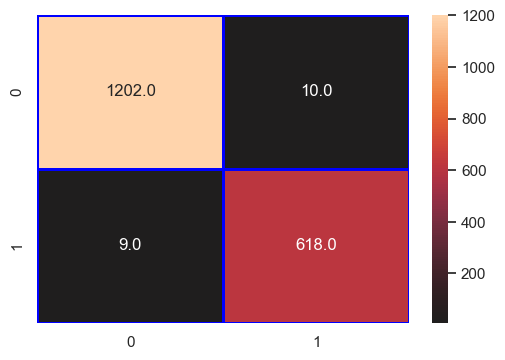




Modele name : AdaBoostClassifier
10 K-Fold Accuracy_score : [1.     0.9986 1.     1.     1.     1.     1.     1.     1.     1.    ]
10 K-Fold Average Accuracy_score : 99.99 %
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1212
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1839
   macro avg       1.00      1.00      1.00      1839
weighted avg       1.00      1.00      1.00      1839

confusion_matrix:
 [[1212    0]
 [   0  627]]


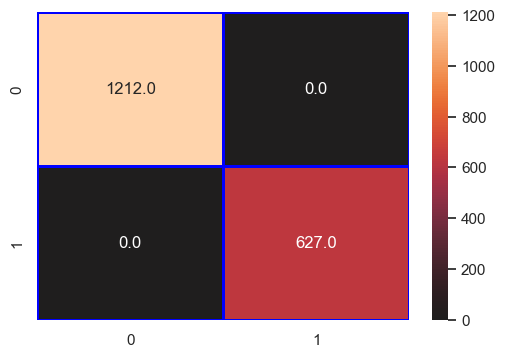




Modele name : BaggingClassifier
10 K-Fold Accuracy_score : [0.9891 0.9783 0.9878 0.981  0.9837 0.9959 0.9905 0.9864 0.9891 0.9905]
10 K-Fold Average Accuracy_score : 98.72 %
Accuracy_score: 98.59 %
Loss: 1.41 %
Cohen_kappa_score: 96.85 %
Classification_report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1212
           1       0.98      0.98      0.98       627

    accuracy                           0.99      1839
   macro avg       0.98      0.98      0.98      1839
weighted avg       0.99      0.99      0.99      1839

confusion_matrix:
 [[1200   12]
 [  14  613]]


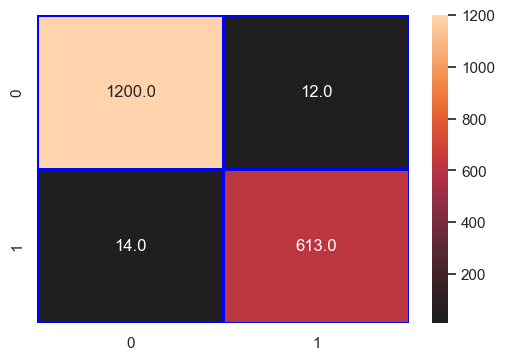




Modele name : DecisionTreeClassifier
10 K-Fold Accuracy_score : [1.     0.9986 1.     1.     1.     1.     1.     1.     1.     1.    ]
10 K-Fold Average Accuracy_score : 99.99 %
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1212
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1839
   macro avg       1.00      1.00      1.00      1839
weighted avg       1.00      1.00      1.00      1839

confusion_matrix:
 [[1212    0]
 [   0  627]]


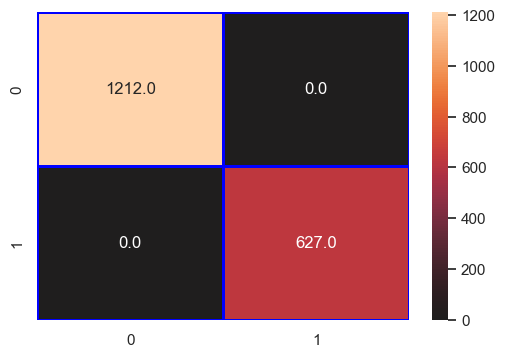




Modele name : RandomForestClassifier
10 K-Fold Accuracy_score : [1.     0.9986 1.     1.     1.     1.     1.     1.     0.9986 1.    ]
10 K-Fold Average Accuracy_score : 99.97 %
Accuracy_score: 100.0 %
Loss: 0.0 %
Cohen_kappa_score: 100.0 %
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1212
           1       1.00      1.00      1.00       627

    accuracy                           1.00      1839
   macro avg       1.00      1.00      1.00      1839
weighted avg       1.00      1.00      1.00      1839

confusion_matrix:
 [[1212    0]
 [   0  627]]


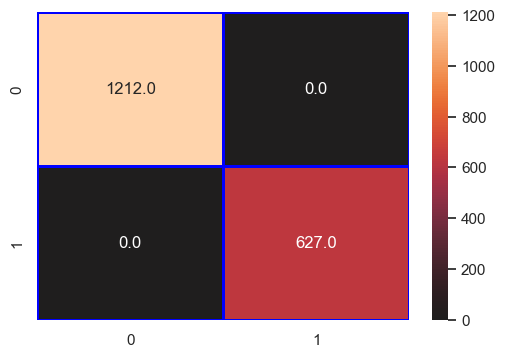

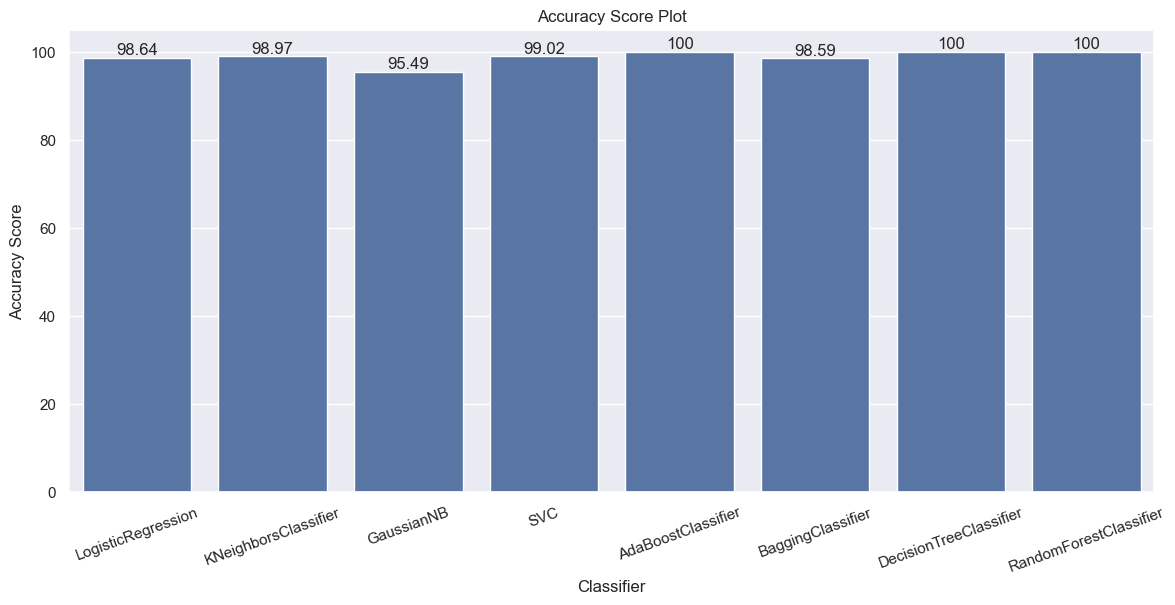

In [102]:
plot_data_list = []
def run_pipeline(X_train, X_test, y_train, y_test, classifier):
    # Model Information
    print(f"Modele name : {type(classifier).__name__}")
    
    # process 2 : train model
    classifier.fit(X_train, y_train)  
    
    # process 4 : test model
    y_pred = classifier.predict(X_test)
    
    # process 5 : Perform k-fold cross-validation using cross_val_score
    scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring='accuracy')
    print(f"10 K-Fold Accuracy_score : {np.round_(scores,4)}")
    print(f"10 K-Fold Average Accuracy_score : {round(np.average(scores)*100,2)} %")
    
    # process 6 : model evalution
    print("Accuracy_score:", round((accuracy_score(y_test, y_pred))*100,2),'%')
    print("Loss:", round((1-accuracy_score(y_test, y_pred))*100,2),'%')
    print("Cohen_kappa_score:", round((cohen_kappa_score(y_test, y_pred))*100,2),'%')
    print("Classification_report:\n",metrics.classification_report(y_test, y_pred))
    print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
    # plot confusion_matrix
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4) # WH
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True,
                fmt=".1f",
                linewidths = 2,
                linecolor = "blue",
                center=0)
    plt.show()
    
    # process 7 : save model in pkl file
    filename = f'Models\\{str(type(classifier).__name__)}_acc{round((accuracy_score(y_test, y_pred))*100,2)}_Solar_Care_Prediction.pkl'
    pickle.dump(classifier, open(filename, 'wb'))
    
    # collect data for bar plot
    global plot_data_list
    plot_data_list.append([str(type(classifier).__name__), 
                           round((accuracy_score(y_test, y_pred))*100,2)])
    
    # end 
    print("==="*30)
    print("\n\n")
    time.sleep(0.5)
    

# Train the models using pipeline
for model in model_list:
    # for scaler in scaler_list:
    run_pipeline(X_train, X_test, y_train, y_test, model)
    
# plot data
# plot_df = pd.DataFrame(plot_data_list, columns=['classifier', 'scaler', 'accuracy_score'])
plot_df = pd.DataFrame(plot_data_list, columns=['classifier', 'accuracy_score'])
plot_df.to_csv(f"..\\Dataset\\accuracy_score_plot_data_Solar_Care_Prediction.csv", index=False)

sns.set(rc={'figure.figsize':(14, 6)})
# ax = sns.barplot(data=plot_df, x="classifier", y="accuracy_score", hue="scaler")
ax = sns.barplot(data=plot_df, x="classifier", y="accuracy_score") # , hue="classifier"
plt.title('Accuracy Score Plot')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
ax.tick_params(axis='x', rotation=20)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# Prediction

In [103]:
import pickle
import numpy as np

# Load the trained model
with open(os.path.join('Models', 'RandomForestClassifier_acc100.0_Solar_Care_Prediction.pkl'), 'rb') as model_file:
    model = pickle.load(model_file)

`range`

> temp : 17.0 - 40.0

> dew : 0.6 - 30.0

> humi : 13.0 - 100.0

In [105]:
# Function to get user input and predict
def get_user_input_and_predict():
    # Get user input for each feature
    temp = float(input("Enter temperature: "))
    dew = float(input("Enter dew point: "))
    humidity = float(input("Enter humidity: "))

    # Prepare data for prediction
    input_data = np.array([[temp, dew, humidity]])

    # Make prediction
    prediction = model.predict(input_data)
    
    # Display the prediction result
    print("Prediction result:", prediction)

# Run the function
get_user_input_and_predict()

Enter temperature: 36
Enter dew point: 10
Enter humidity: 19
Prediction result: [1]


In [106]:
get_user_input_and_predict()

Enter temperature: 24
Enter dew point: 10
Enter humidity: 89
Prediction result: [0]
